<a href="https://colab.research.google.com/github/nhunbtran155/exercise-25-3-2025/blob/main/exercise_15_4_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

emotion_path = '/content/drive/MyDrive/emotion_dataset'
face_dataset_path = '/content/drive/MyDrive/face_dataset'

known_persons = [folder.replace('_', ' ') for folder in os.listdir(face_dataset_path)
                 if os.path.isdir(os.path.join(face_dataset_path, folder))]

images, emotion_labels, person_names = [], [], []

for folder in os.listdir(emotion_path):
    folder_path = os.path.join(emotion_path, folder)
    if os.path.isdir(folder_path):
        try:
            person = folder.split('_')[0]
            emotion = folder.split('_')[1]
        except:
            continue
        for file in os.listdir(folder_path):
            if file.lower().endswith(('jpg', 'png', 'jpeg')):
                img = cv2.imread(os.path.join(folder_path, file))
                img = cv2.resize(img, (100, 100)).astype('float32') / 255.0
                images.append(img)
                emotion_labels.append(emotion)
                person_names.append(person)

le_emotion = LabelEncoder()
emotion_encoded = le_emotion.fit_transform(emotion_labels)
emotion_cat = to_categorical(emotion_encoded)

X_train, X_test, y_train, y_test = train_test_split(np.array(images), emotion_cat, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(emotion_cat.shape[1], activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
def predict_emotion_with_name(image_path):

    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (100,100)).astype('float32') / 255.0
    img_input = np.expand_dims(img_resized, axis=0)

    prediction = model.predict(img_input)
    predicted_emotion = le_emotion.inverse_transform([np.argmax(prediction)])[0]

    folder_name = os.path.basename(os.path.dirname(image_path)).lower()
    person_raw = folder_name.split('_')[0].capitalize()

    matched_name = [name for name in known_persons if person_raw.lower() in name.lower()]
    final_name = matched_name[0] if matched_name else person_raw
    img_display = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.imshow(img_display)
    plt.title(f'{final_name} đang cảm thấy {predicted_emotion.upper()}')
    plt.axis('off')
    plt.show()
    print(f'{final_name} đang cảm thấy {predicted_emotion.upper()}')


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.1516 - loss: 1.9285 - val_accuracy: 0.2308 - val_loss: 1.3754
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.3864 - loss: 1.4524 - val_accuracy: 0.3077 - val_loss: 1.2808
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2951 - loss: 1.4470 - val_accuracy: 0.4615 - val_loss: 1.0730
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.3629 - loss: 1.1201 - val_accuracy: 0.3846 - val_loss: 1.1070
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4542 - loss: 0.9651 - val_accuracy: 0.3846 - val_loss: 1.0411
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5770 - loss: 0.8881 - val_accuracy: 0.5385 - val_loss: 1.0188
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6162 - loss: 0.8561 - val_accuracy: 0.3846 - val_loss: 1.0772
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5014 - loss: 0.9201 - val_accuracy: 0.5385 - val_loss: 1.0258
Epoch 9/50
2/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


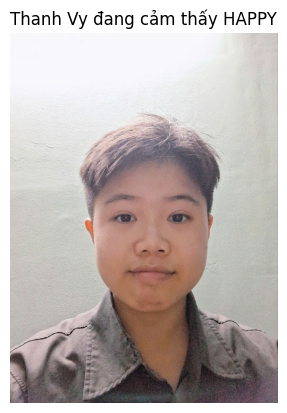

Thanh Vy đang cảm thấy HAPPY


In [63]:
test_image = '/content/drive/MyDrive/emotion_dataset/ha_happy/2.jpg'
predict_emotion_with_name(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


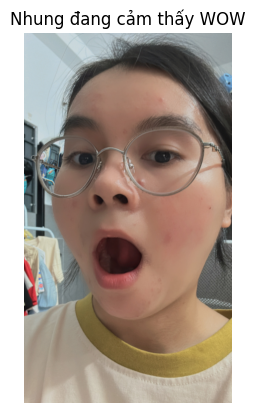

Nhung đang cảm thấy WOW


In [64]:
test_image = '/content/drive/MyDrive/emotion_dataset/nhung_wow/img3.jpg'
predict_emotion_with_name(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


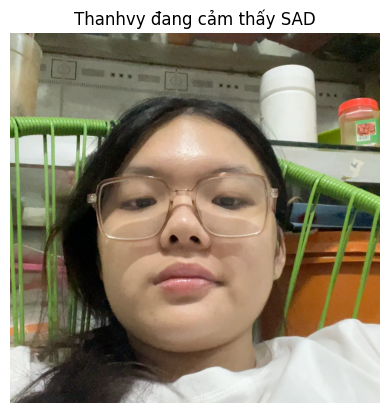

Thanhvy đang cảm thấy SAD


In [65]:
test_image = '/content/drive/MyDrive/emotion_dataset/thanhvy_sad/IMG_5926.PNG'
predict_emotion_with_name(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


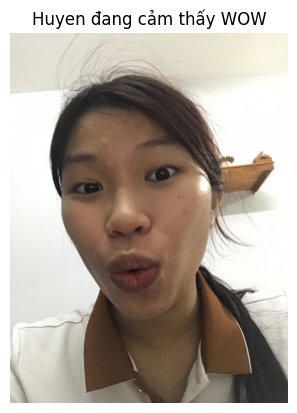

Huyen đang cảm thấy WOW


In [66]:
test_image = '/content/drive/MyDrive/emotion_dataset/huyen_wow/3_n.jpg'
predict_emotion_with_name(test_image)